<a href="https://colab.research.google.com/github/ktarun1681/Movie-Recommendation-System-using-Machine-Learning-with-Python/blob/main/Movie_Recommendation_System_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies required for this Project.

What are Recommendation systems?


Recommendation systems are becoming increasingly important in today’s extremely busy world. People are always short on time with the myriad tasks they need to accomplish in the limited 24 hours. Therefore, the recommendation systems are important as they help them make the right choices, without having to expend their cognitive resources.

The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user/individual. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

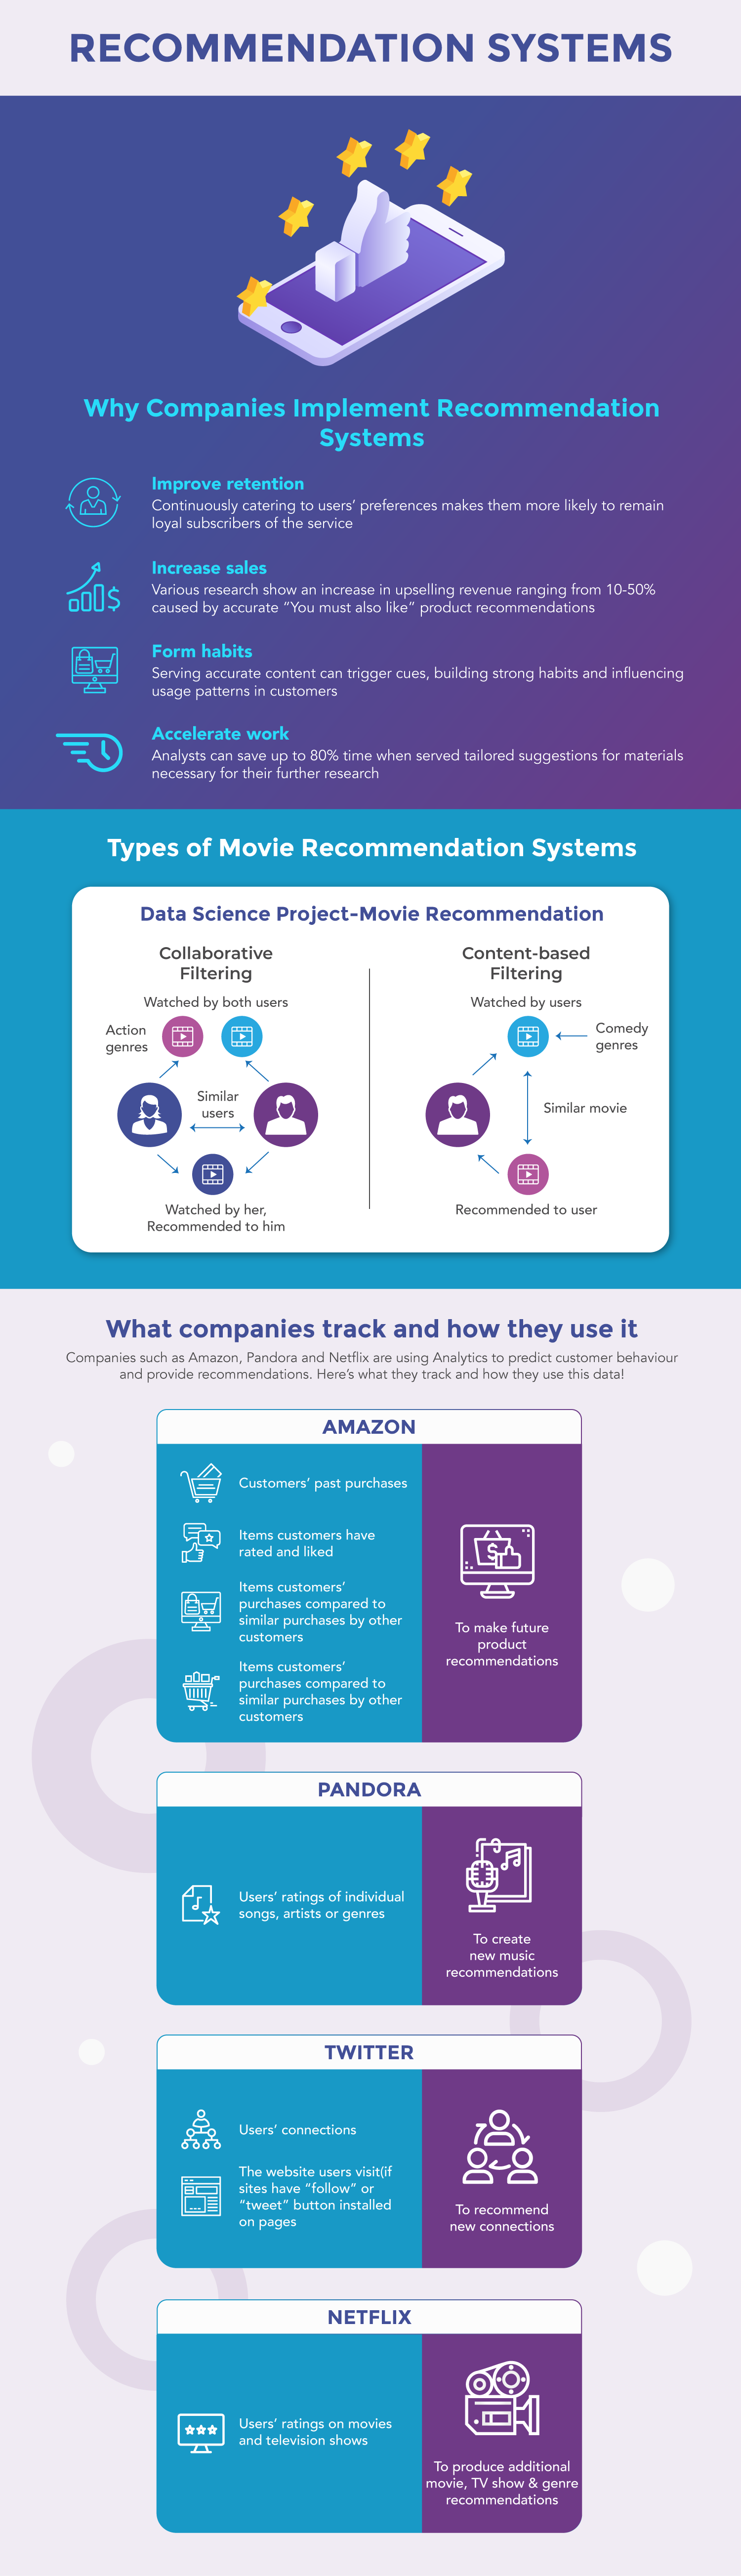

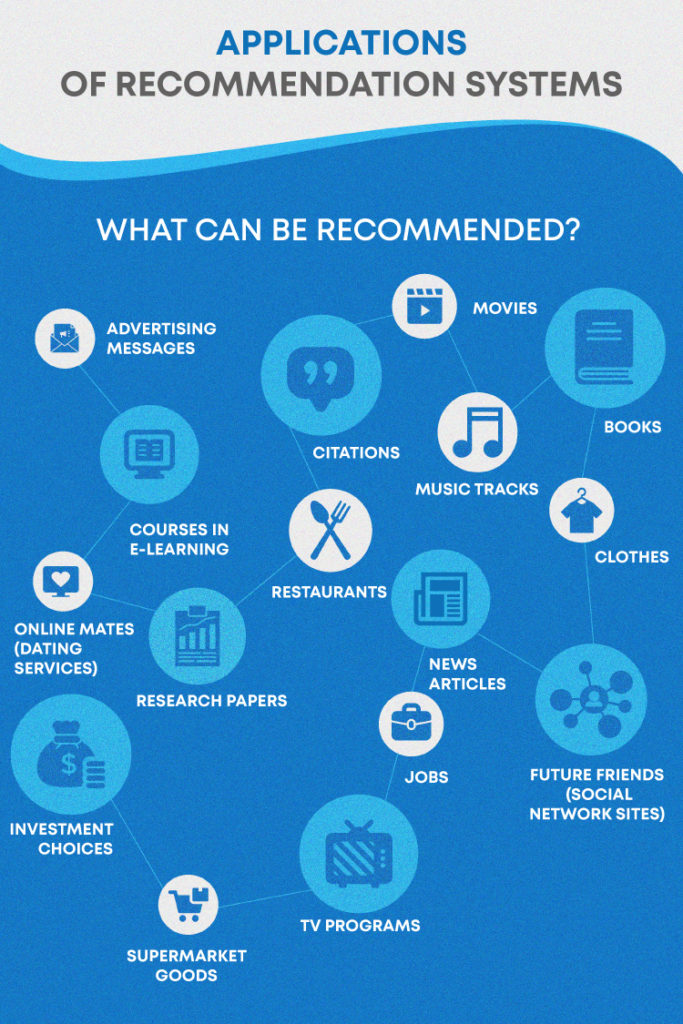

**Importing all the dependencies**:

In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Preprocessing:

In [2]:
#loading the data from csv file to pandas dataframe

movies_data = pd.read_csv('/content/drive/MyDrive/Datasets/movies.csv')

In [3]:
#printing the sample data by looking at the first five rows of the dataset

movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
#checking the number of rows and colums

movies_data.shape

(4803, 24)

In [5]:
#selecting the relevent features for recommendation

selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [6]:
#replacing all the null values with null string in our selected columns:

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna(' ')

In [7]:
#combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [8]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance   A newlywed couple's honeymoon...
4800    Comedy Drama Romance TV Movie date love at fir...
4801        A New Yorker in Shanghai Daniel Henney Eli...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [9]:
#converting the text data to feature vectors:

vectorizer = TfidfVectorizer()

In [10]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [11]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

**Cosine Similarity**

In [14]:
#getting the similarity scores using the cosine similarity

similarity = cosine_similarity(feature_vectors)

In [15]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [16]:
similarity.shape

(4803, 4803)

**Getting the movie name from the user:**

In [18]:
#getting the movie name from the user

movie_name = input(' Enter your favorite movie name: ')

 Enter your favorite movie name: Avengers


In [20]:
#creating a list with all the movies given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
#finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['The Avengers', 'Swingers']


In [23]:
close_match = find_close_match[0]
print(close_match)

The Avengers


In [24]:
#finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

16


In [26]:
#getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.03426340578061641), (1, 0.018757441743698592), (2, 0.03907993864609115), (3, 0.006602224357539788), (4, 0.05721539202804143), (5, 0.014194201691251133), (6, 0.02358797178187124), (7, 0.7860896884964055), (8, 0.008045023221038158), (9, 0.16210160555183875), (10, 0.07691564861356003), (11, 0.01217213686353538), (12, 0.013990444052447457), (13, 0.012631427434045384), (14, 0.1837336996264891), (15, 0.04563629684495581), (16, 0.9999999999999999), (17, 0.013383483902995971), (18, 0.02529414696558761), (19, 0.01188236224021718), (20, 0.11215733913329524), (21, 0.027050077660405823), (22, 0.007034788718083841), (23, 0.036653962075193565), (24, 0.01292652624563084), (25, 0.010727286350311038), (26, 0.4046969407600009), (27, 0.03121225816313765), (28, 0.06887119248461429), (29, 0.025483413379835257), (30, 0.11350883208096145), (31, 0.21487810271500662), (32, 0.029868095335032138), (33, 0.2505154038738609), (34, 0.0), (35, 0.036079460398325214), (36, 0.05009193086600237), (37, 0.0081898908

In [27]:
len(similarity_score)

4803

In [28]:
#sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse= True)
print(sorted_similar_movies)

[(16, 0.9999999999999999), (7, 0.7860896884964055), (85, 0.4301532854607663), (26, 0.4046969407600009), (79, 0.3933653363061258), (126, 0.312803363203424), (511, 0.2892396085894662), (174, 0.28862963963238886), (64, 0.27464767891998554), (182, 0.27276411277152907), (129, 0.26928516313639983), (203, 0.25660973492915823), (33, 0.2505154038738609), (788, 0.24366990820486284), (46, 0.24006691472148445), (169, 0.23702484619175357), (38, 0.2338952010106937), (4759, 0.23084821219774054), (68, 0.22704403782296803), (31, 0.21487810271500662), (14, 0.1837336996264891), (782, 0.1825529075668662), (870, 0.1821588304668644), (101, 0.18018869067098506), (94, 0.16311290114551133), (9, 0.16210160555183875), (1294, 0.15229231204591692), (1192, 0.1517599526469107), (241, 0.15100480467438165), (4401, 0.1480526961044298), (2197, 0.14650796705575336), (1720, 0.14569980465005258), (713, 0.1452783854259603), (1740, 0.14444382118424323), (122, 0.14409292201469673), (242, 0.1411718728209748), (700, 0.138691786

In [30]:
#printing the name of the similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<51):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Captain America: Civil War
5 . Iron Man 2
6 . Thor: The Dark World
7 . X-Men
8 . The Incredible Hulk
9 . X-Men: Apocalypse
10 . Ant-Man
11 . Thor
12 . X2
13 . X-Men: The Last Stand
14 . Deadpool
15 . X-Men: Days of Future Past
16 . Captain America: The First Avenger
17 . The Amazing Spider-Man 2
18 . The Image Revolution
19 . Iron Man
20 . Iron Man 3
21 . Man of Steel
22 . The Spirit
23 . Superman II
24 . X-Men: First Class
25 . Guardians of the Galaxy
26 . Batman v Superman: Dawn of Justice
27 . Serenity
28 . Spawn
29 . Teenage Mutant Ninja Turtles: Out of the Shadows
30 . The Helix... Loaded
31 . What's Your Number?
32 . Kick-Ass
33 . The Horse Whisperer
34 . Kick-Ass 2
35 . X-Men Origins: Wolverine
36 . Fantastic Four
37 . 2 Guns
38 . Zodiac
39 . Red Sonja
40 . TMNT
41 . Street Fighter: The Legend of Chun-Li
42 . Watchmen
43 . Sin City
44 . Money Train
45 . A Scanner

Movie Recommendation Sytem:

In [32]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<51):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Avtar
Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander
30 . Sunshine
31 . The Terminator
32 . Zathura: A Space Adventure
33 . Crocodile Dundee
34 . Silent Running
35 . Imaginary Heroes
36 . Supernova
37 . Shadow Conspiracy
38 . Lost in Space
39 . Terminator Genisys
40 . Titan A.E.
41 . In the Shadow of the Moon
42 . Space Chimps
43 . Alien: Resurrection
44 . The Book of Life
45 . The Iron Giant
46 . Treasure Planet
47 . Gods and Generals
48 .